In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
import time

In [85]:
data = load_iris(as_frame=False)
X = data.data
Y = data.target
target_names = data.target_names

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=60)
modelo = LogisticRegression(random_state=60)
modelo.fit(X_train, y_train)
pred = modelo.predict(X_test)
pred_prob = modelo.predict_proba(X_test)
max_probabilities = np.max(pred_prob, axis=1)

In [87]:
for i in range(len(pred)):
    print(f'Target names: {target_names[pred][i]}')
    print(f'prediction: {pred[i]}')
    print(f'True target: {y_test[i]}')
    print(f'Probability: {max_probabilities.round(2)[i]}')

Target names: versicolor
prediction: 1
True target: 1
Probability: 0.96
Target names: versicolor
prediction: 1
True target: 1
Probability: 0.95
Target names: versicolor
prediction: 1
True target: 1
Probability: 0.92
Target names: setosa
prediction: 0
True target: 0
Probability: 0.98
Target names: versicolor
prediction: 1
True target: 1
Probability: 0.85
Target names: setosa
prediction: 0
True target: 0
Probability: 0.98
Target names: versicolor
prediction: 1
True target: 1
Probability: 0.96
Target names: setosa
prediction: 0
True target: 0
Probability: 0.99
Target names: setosa
prediction: 0
True target: 0
Probability: 0.94
Target names: virginica
prediction: 2
True target: 2
Probability: 0.51
Target names: setosa
prediction: 0
True target: 0
Probability: 0.98
Target names: setosa
prediction: 0
True target: 0
Probability: 0.98
Target names: virginica
prediction: 2
True target: 2
Probability: 0.86
Target names: versicolor
prediction: 1
True target: 1
Probability: 0.79
Target names: virg

In [88]:
print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred,average='weighted'))
print(recall_score(y_test, pred,average='weighted'))
print(f1_score(y_test, pred, average='weighted'))

0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315


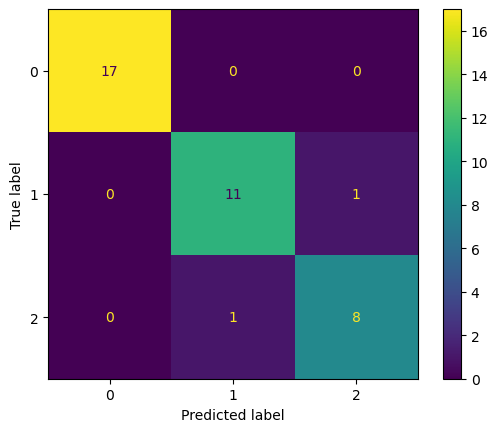

In [89]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.show()

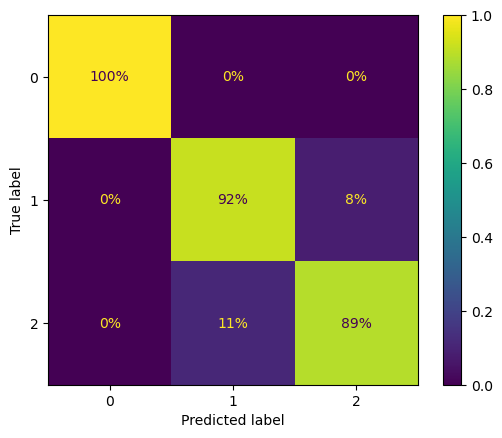

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test, pred, normalize="true",values_format=".0%")
plt.show()

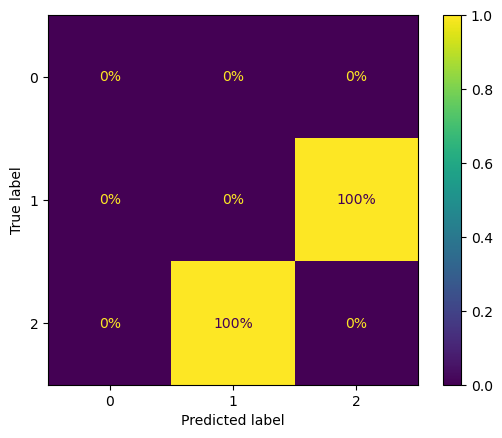

In [91]:
sample_weight = (pred != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

In [92]:

y_train_reshaped = y_train.reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train_reshaped)


y_test_reshaped = y_test.reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
y_test_encoded = encoder.fit_transform(y_test_reshaped)

print(y_test_encoded)


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [93]:
eta = 0.01
n_epochs = 10000
theta = np.random.randn(X_train.shape[1],1)
n = len(X_train)

costs = []
start_time = time.time()
def softmax(X_train):
    exp_X = np.exp(X_train - np.max(X_train, axis = 1, keepdims= True))
    return exp_X / np.sum(exp_X, axis=1, keepdims=True)

for epochs in range(n_epochs):
    logit = X_train @ theta
    prob = softmax(logit)
    grad = 1 / n * X_train.T @ (prob - y_train_encoded)
    theta = theta - eta * grad 
    cost = (-1/n) * np.sum(y_train_encoded * np.log(prob + 1e-9))
    costs.append(cost)

end_time = time.time()
exc_time = end_time - start_time
print(f"Tempo total de execução: {exc_time:.4f} segundos")
print(costs)

Tempo total de execução: 0.4645 segundos
[-1.000000082240371e-09, 1.0797958839007034, 1.0660922184871753, 1.0555468708015618, 1.0469694935375138, 1.0396344564604498, 1.0330978149963999, 1.027086280098082, 1.0214302099254842, 1.0160232378567302, 1.010797910361952, 1.0057109212795552, 1.0007341023240892, 0.9958488788247198, 0.9910428240262752, 0.9863074943774175, 0.9816370541502952, 0.9770273915912134, 0.9724755446209545, 0.9679793237485593, 0.9635370620851504, 0.9591474481880118, 0.9548094134527292, 0.9505220557748328, 0.9462845875359761, 0.9420963000273359, 0.9379565390526562, 0.9338646881764561, 0.9298201572235443, 0.9258223743980497, 0.9218707809035591, 0.9179648272943352, 0.9141039710254595, 0.9102876748330663, 0.9065154056884428, 0.90278663414772, 0.8991008339729895, 0.8954574819383466, 0.8918560577606081, 0.8882960441127832, 0.8847769266911892, 0.8812981943160456, 0.8778593390516445, 0.874459856336567, 0.8710992451174635, 0.8677770079820403, 0.8644926512883837, 0.8612456852887634,

In [96]:
correct_predictions = 0
n = len(X_test)
for i in range(n):
    logits = X_test[i] @ theta
    prob = softmax(logits.reshape(1, -1))
    predicted_class = np.argmax(prob)
    true_class = np.argmax(y_test_encoded[i])
    cost = -np.sum(y_test_encoded[i] * np.log(prob + 1e-9))

    print(f"  Amostra {i + 1}:")
    print(f"  Probabilidades: {prob.flatten()}")
    print(f"  Custo: {cost:.4f}")
    print(f"  Predição: {target_names[predicted_class]} (classe {predicted_class})")
    print(f"  Verdadeiro: {target_names[true_class]} (classe {true_class})")
    print(f"  Correto: {'Sim' if predicted_class == true_class else 'Não'}")
    if predicted_class == true_class:
        correct_predictions += 1
accuracy = correct_predictions / n
print(f"\nTotal de predições corretas: {correct_predictions}")
print(f"Total de predições erradas: {n - correct_predictions}")
print(f"Acurácia: {accuracy:.4f}")

  Amostra 1:
  Probabilidades: [0.01191415 0.9213914  0.06669445]
  Custo: 0.0819
  Predição: versicolor (classe 1)
  Verdadeiro: versicolor (classe 1)
  Correto: Sim
  Amostra 2:
  Probabilidades: [0.01897005 0.94917678 0.03185316]
  Custo: 0.0522
  Predição: versicolor (classe 1)
  Verdadeiro: versicolor (classe 1)
  Correto: Sim
  Amostra 3:
  Probabilidades: [0.01024657 0.94118435 0.04856907]
  Custo: 0.0606
  Predição: versicolor (classe 1)
  Verdadeiro: versicolor (classe 1)
  Correto: Sim
  Amostra 4:
  Probabilidades: [9.81978606e-01 1.80213397e-02 5.46826652e-08]
  Custo: 0.0182
  Predição: setosa (classe 0)
  Verdadeiro: setosa (classe 0)
  Correto: Sim
  Amostra 5:
  Probabilidades: [0.00244373 0.84316843 0.15438784]
  Custo: 0.1706
  Predição: versicolor (classe 1)
  Verdadeiro: versicolor (classe 1)
  Correto: Sim
  Amostra 6:
  Probabilidades: [9.88678143e-01 1.13218501e-02 6.77671315e-09]
  Custo: 0.0114
  Predição: setosa (classe 0)
  Verdadeiro: setosa (classe 0)
  Cor